In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
dataframe = pd.read_csv("csv/82000278_Toamnei_CO2_2021_7_SHORT.csv")
dataframe.head()

,time,latitude,longitude,altitude,co2
0,1625086823,45.651464,25.615426,100,553
1,1625086883,45.651464,25.615426,100,551
2,1625086943,45.651464,25.615426,100,551
3,1625087003,45.651464,25.615426,100,558
4,1625087063,45.651464,25.615426,100,559


In [29]:
dataframe_size = len(dataframe.index)
dataframe_size

10499

In [30]:
train = dataframe[dataframe.index < dataframe_size*(3/4)]
test = dataframe[dataframe.index >= dataframe_size*(3/4)]

In [31]:
y_train = train['co2']
y_train

0       553
1       551
2       551
3       558
4       559
       ... 
7870    458
7871    453
7872    447
7873    443
7874    444
Name: co2, Length: 7875, dtype: int64

In [32]:
y_test = test['co2']
y_test

7875     445
7876     453
7877     452
7878     452
7879     448
        ... 
10494    671
10495    671
10496    671
10497    670
10498    674
Name: co2, Length: 2624, dtype: int64

In [33]:
x_train = train['time']
x_train

0       1625086823
1       1625086883
2       1625086943
3       1625087003
4       1625087063
           ...    
7870    1625558999
7871    1625559059
7872    1625559119
7873    1625559179
7874    1625559239
Name: time, Length: 7875, dtype: int64

In [34]:
x_test = test['time']
x_test

7875     1625559300
7876     1625559360
7877     1625559420
7878     1625559479
7879     1625559540
            ...    
10494    1625716432
10495    1625716492
10496    1625716553
10497    1625716613
10498    1625716673
Name: time, Length: 2624, dtype: int64

In [35]:
# Convert to numpy array
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

x_test

array([[1625559300],
       [1625559360],
       [1625559420],
       ...,
       [1625716553],
       [1625716613],
       [1625716673]], dtype=int64)

In [36]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(bootstrap=True, max_depth=55, max_features='sqrt', min_samples_leaf=5, min_samples_split=6, n_estimators=600)


# from sklearn.ensemble import GradientBoostingRegressor
# all_models = {}
# common_params = dict(
#     learning_rate=0.05,
#     n_estimators=200,
#     max_depth=2,
#     min_samples_leaf=9,
#     min_samples_split=9,
# )
# for alpha in [0.05, 0.5, 0.95]:
#     gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
#     all_models["q %1.2f" % alpha] = gbr.fit(x_train, y_train)
# clf = GradientBoostingRegressor(loss="quantile", **common_params)


# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import AdaBoostRegressor
# rng = np.random.RandomState(1)
# clf = AdaBoostRegressor( DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)

In [37]:
clf.fit(x_train, y_train)

C:\Users\Valentin.Adam\AppData\Local\Temp\ipykernel_20552\3292451027.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestRegressor(max_depth=55, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=6, n_estimators=600)

In [38]:
# clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

array([453.75279939, 453.75279939, 453.75279939, ..., 453.75279939,
       453.75279939, 453.75279939])

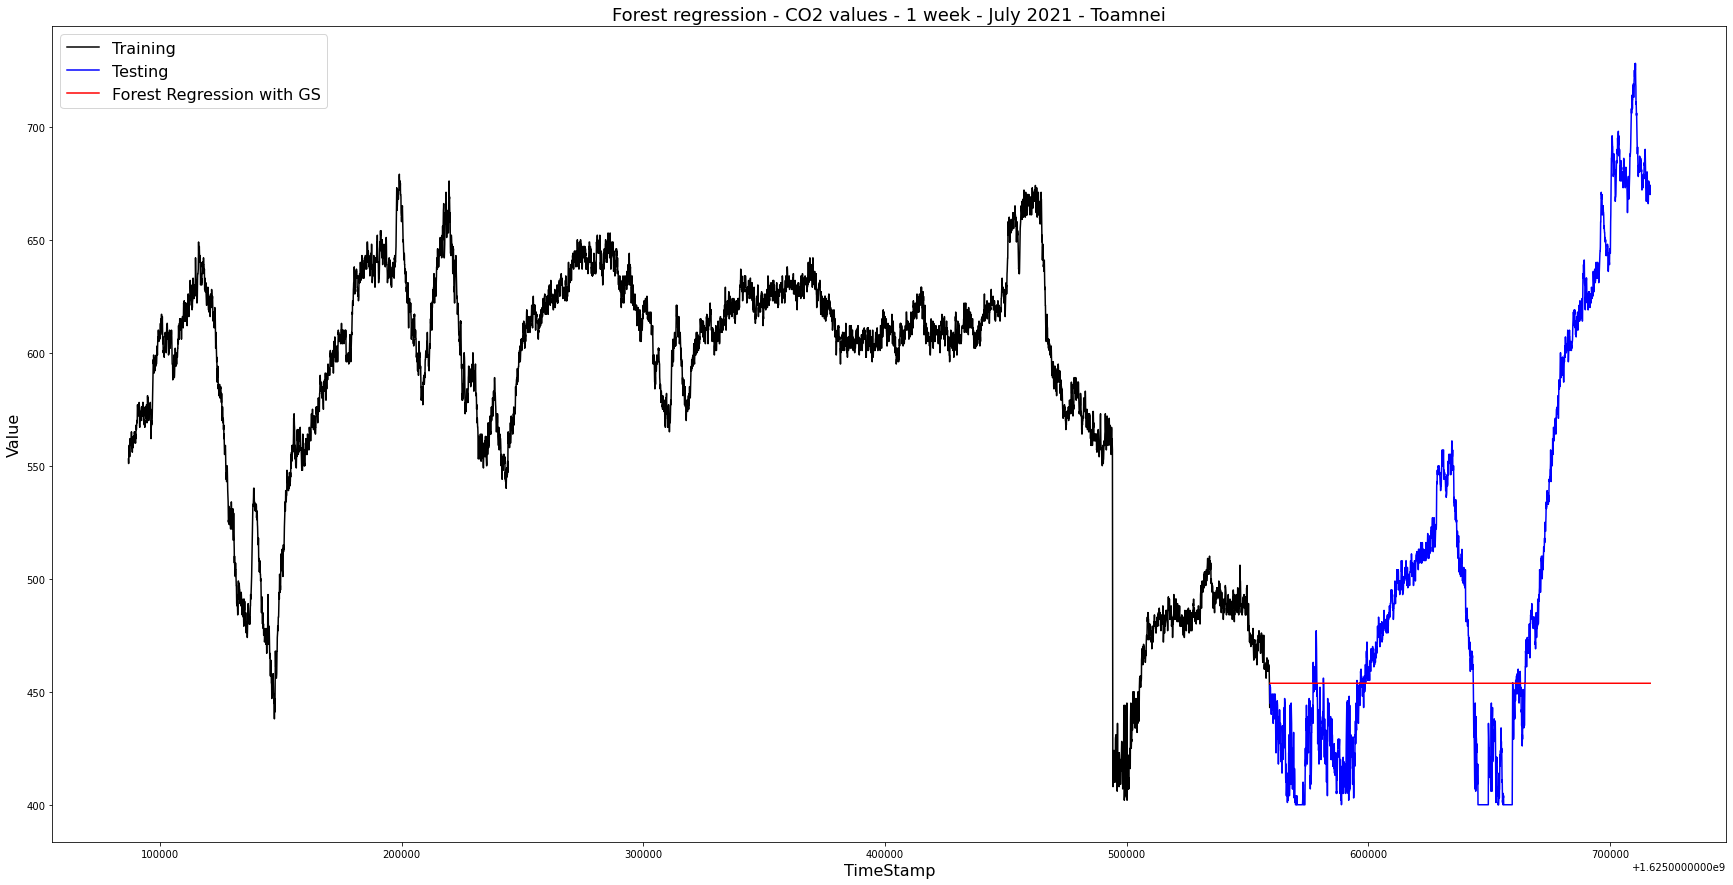

In [39]:
plt.figure(figsize=(30,15))
plt.plot(x_train, y_train, color = 'black', label= 'Training')
plt.plot(x_test, y_test, color = 'blue', label = 'Testing')
plt.plot(x_test, y_pred, color = 'red', label = 'Forest Regression with GS')
# plt.scatter(X, y, color = "green")
# plt.scatter(X, y_pred, color = "black")
plt.title('Forest regression - CO2 values - 1 week - July 2021 - Toamnei', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
# plt.savefig('plots_from_csv/PM10_Toamnei_2021-12_ARD.jpg', bbox_inches = 'tight')
plt.show()